In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [4]:
df.shape

(1453, 15)

In [5]:
df.iloc[1]

yummy                            Yes
convenient                       Yes
spicy                             No
fattening                        Yes
greasy                           Yes
fast                             Yes
cheap                            Yes
tasty                            Yes
expensive                        Yes
healthy                           No
disgusting                        No
Like                              +2
Age                               51
VisitFrequency    Every three months
Gender                        Female
Name: 1, dtype: object

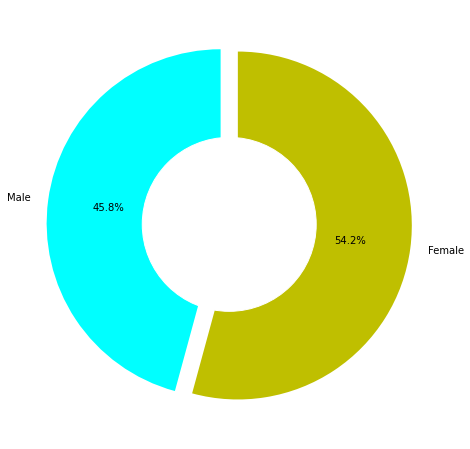

In [6]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]

colors = ['cyan','y']

explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.65,explode=explode)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


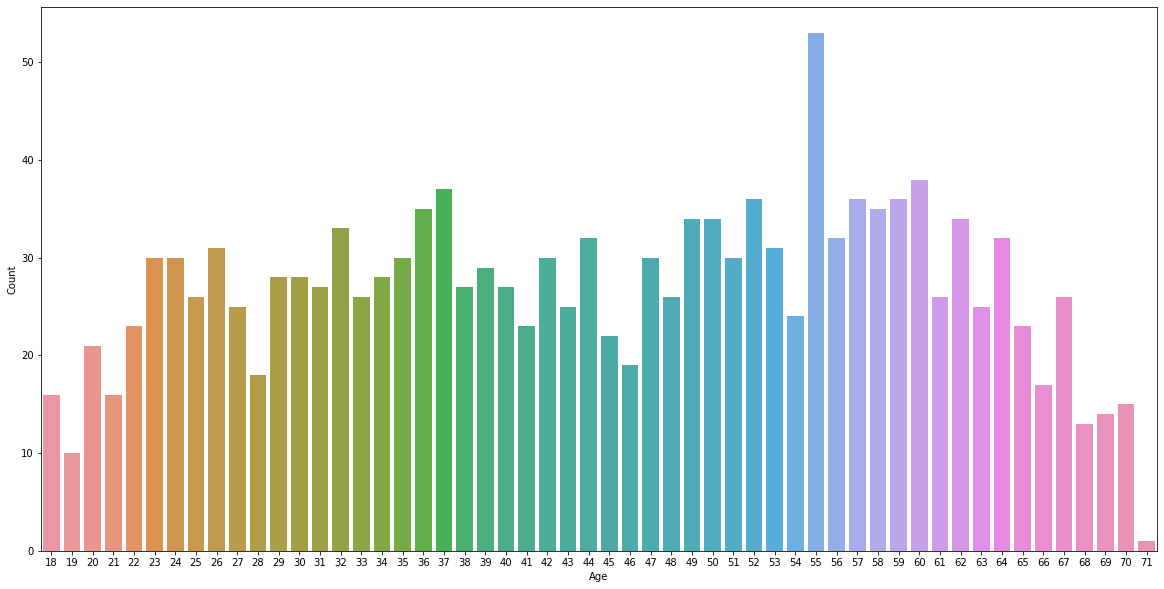

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(df.Age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

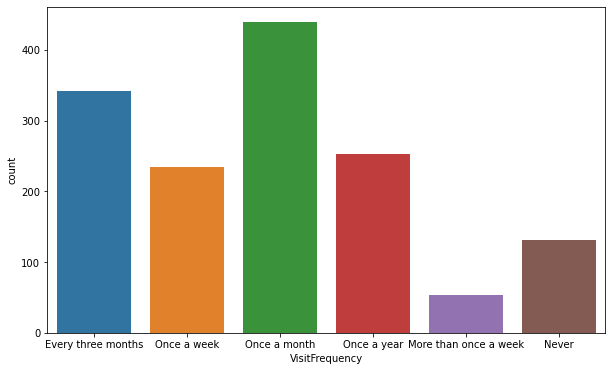

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='VisitFrequency')
plt.show()

In [9]:
def check_unique_values(df):
    for col in df.columns:
        if df[col].dtype == object:
            print("------------",col,"------------")
            print("Value",(len(df[col][0])-2)*" ","Count")
            print(df[col].value_counts())
            print("\n")

In [10]:
check_unique_values(df)

------------ yummy ------------
Value  Count
Yes    803
No     650
Name: yummy, dtype: int64


------------ convenient ------------
Value   Count
Yes    1319
No      134
Name: convenient, dtype: int64


------------ spicy ------------
Value  Count
No     1317
Yes     136
Name: spicy, dtype: int64


------------ fattening ------------
Value   Count
Yes    1260
No      193
Name: fattening, dtype: int64


------------ greasy ------------
Value  Count
Yes    765
No     688
Name: greasy, dtype: int64


------------ fast ------------
Value   Count
Yes    1308
No      145
Name: fast, dtype: int64


------------ cheap ------------
Value   Count
Yes    870
No     583
Name: cheap, dtype: int64


------------ tasty ------------
Value  Count
Yes    936
No     517
Name: tasty, dtype: int64


------------ expensive ------------
Value   Count
No     933
Yes    520
Name: expensive, dtype: int64


------------ healthy ------------
Value  Count
No     1164
Yes     289
Name: healthy, dtype: int64


-----

In [11]:
df2 = df.copy()
df2.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
346,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,I love it!+5,38,Once a week,Female
266,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,I hate it!-5,50,Never,Male
328,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,No,+2,44,Once a month,Male
587,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,+3,26,Once a week,Male
564,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,48,Every three months,Male


In [12]:
def VisitFreq_To_Numeric(i):
    lyst = ['Never','Once a year','Every three months','Once a month','Once a week','More than once a week']
    return lyst.index(i)

df2.replace({'Yes':1,'No':0},inplace=True)
df2['Gender'].replace({'Female':0,'Male':1},inplace=True)
df2['VisitFrequency'].replace({'Never':0,'Once a year':1,'Every three months':2,'Once a month':3,'Once a week':4,'More than once a week':5},inplace=True)
tmp = df2['Like'].apply(lambda x: int(x[-1]) if x in ["I hate it!-5","I love it!+5"] else int(x))
df2['Like']=tmp
df2.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,1.823125,44.604955,2.383345,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,2.644390,14.221178,1.292987,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


In [13]:
df2.dtypes

yummy             int64
convenient        int64
spicy             int64
fattening         int64
greasy            int64
fast              int64
cheap             int64
tasty             int64
expensive         int64
healthy           int64
disgusting        int64
Like              int64
Age               int64
VisitFrequency    int64
Gender            int64
dtype: object

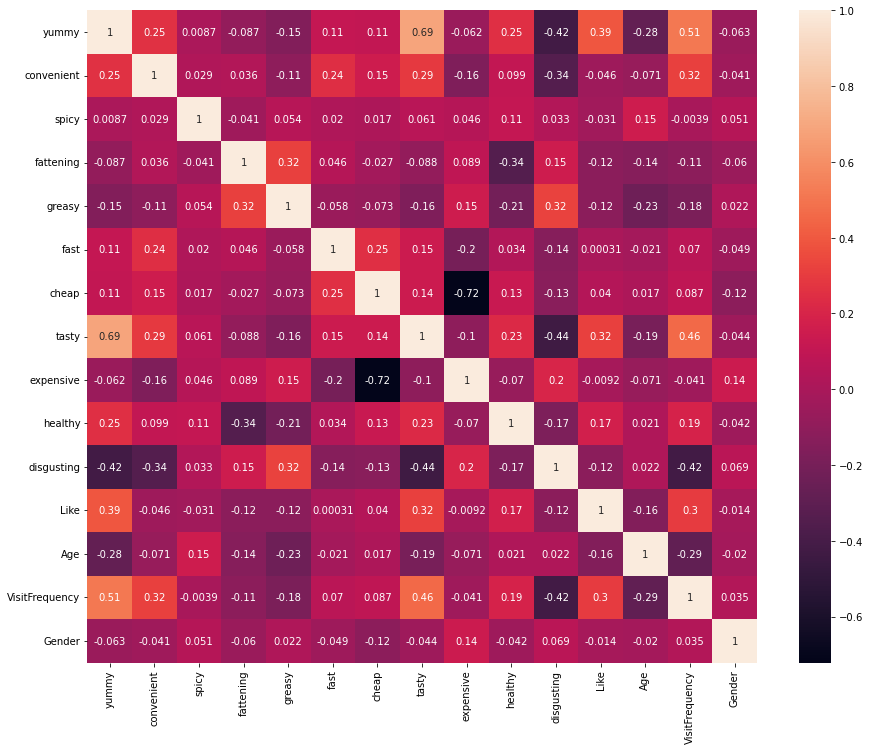

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [15]:
df2.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,1.823125,44.604955,2.383345,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,2.644390,14.221178,1.292987,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


In [16]:
scaler = MinMaxScaler()

In [17]:
X = scaler.fit_transform(df2)

In [18]:
X=X[: , :11]

In [19]:
#  Principal Components Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X)
PCDf = pd.DataFrame(data = principalComponents
             ,columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
PCDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [20]:
sf = PCDf.std()
df_pca = pd.DataFrame({'PC idx':sf.index, 'Res': sf.values})
df_pca['Variance_ratio'] = pca.explained_variance_ratio_
df_pca['Sum'] = np.cumsum(pca.explained_variance_ratio_)
df_pca

,PC idx,Res,Variance_ratio,Sum
0,PC1,0.757050,0.299447,0.299447
1,PC2,0.607456,0.192797,0.492244
2,PC3,0.504619,0.133045,0.625290
3,PC4,0.398799,0.083096,0.708386
4,PC5,0.337405,0.059481,0.767866
5,PC6,0.310275,0.050300,0.818166
6,PC7,0.289697,0.043849,0.862015
7,PC8,0.275122,0.039548,0.901563
8,PC9,0.265251,0.036761,0.938323
9,PC10,0.248842,0.032353,0.970677


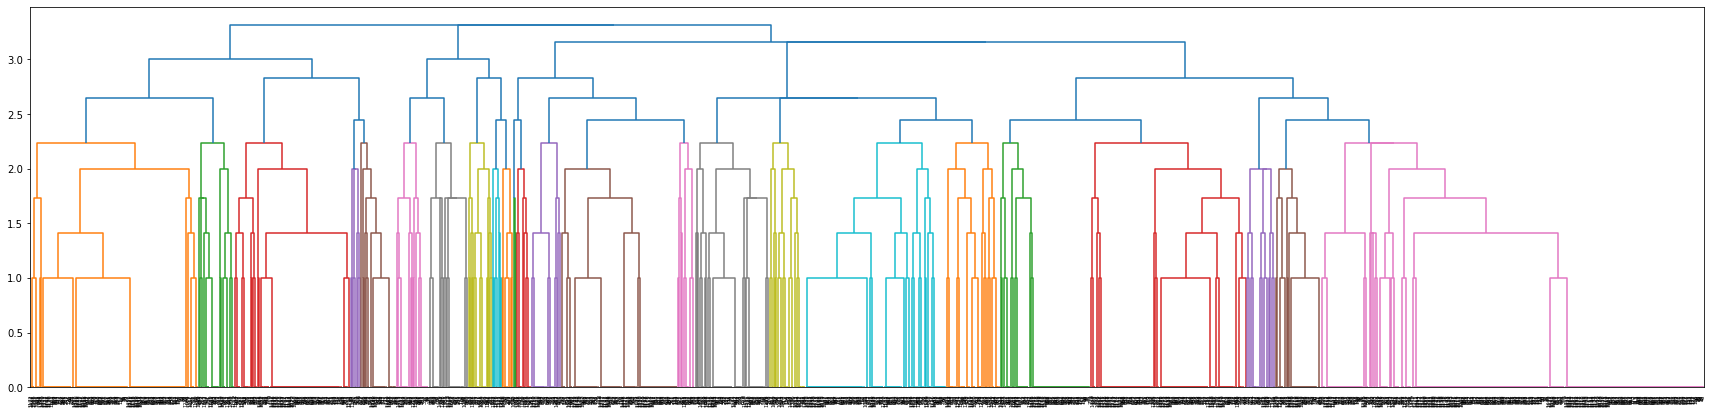

In [21]:
linked = linkage(PCDf,'complete')
plt.figure(figsize=(30, 7))
dendrogram(linked, orientation='top')
plt.show()

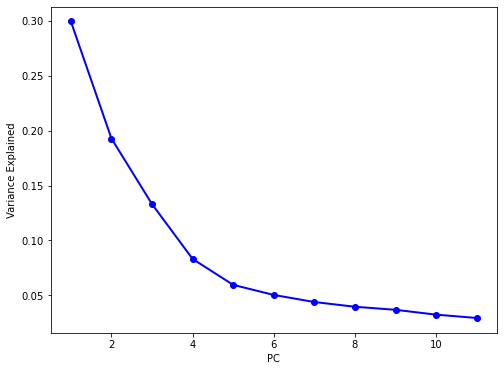

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

In [23]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
def func(k_rng):
    sse = []
    for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(X)
        sse.append(km.inertia_)
    return sse
sse = func(k_rng)

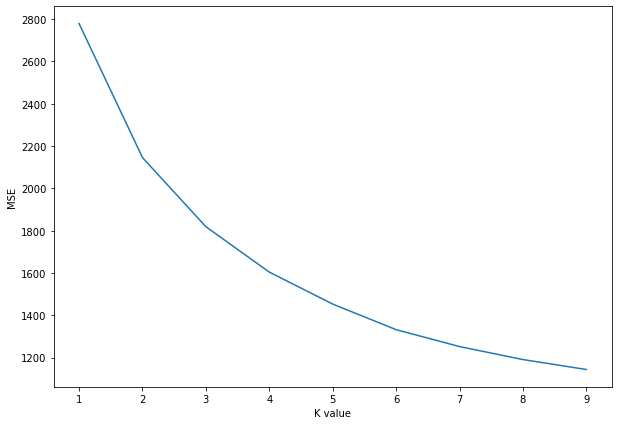

In [24]:
plt.figure(figsize=(10,7))
plt.xlabel('K value')
plt.ylabel('MSE')
plt.plot(k_rng,sse)

In [25]:
model = KMeans(n_clusters=4,random_state=0)
y_predicted = model.fit_predict(X)
y_predicted

array([2, 0, 0, ..., 0, 1, 3])

In [26]:
df2['cluster']=y_predicted
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,2


In [27]:
centroids = model.cluster_centers_
print(centroids)

[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


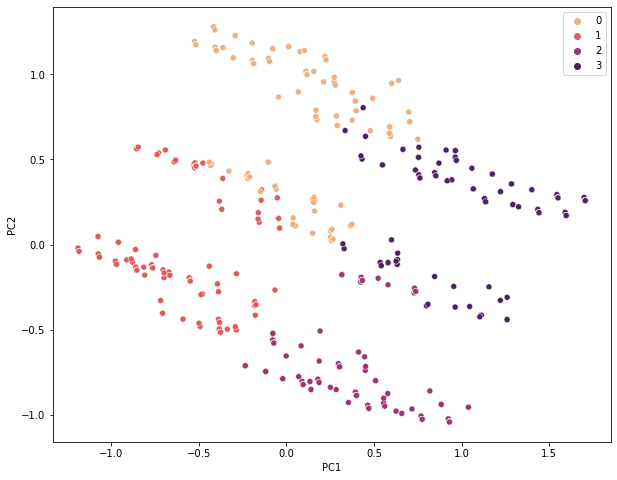

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=PCDf, x="PC1", y="PC2",hue=model.labels_,palette="flare")
plt.legend()
plt.show()